In [146]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of execution times: old vs new

In [147]:
extimes_old = np.loadtxt('data/figure 2.1/sgbdold.dat')
extimes_new = np.loadtxt('data/figure 2.1/sgbdnew.dat')

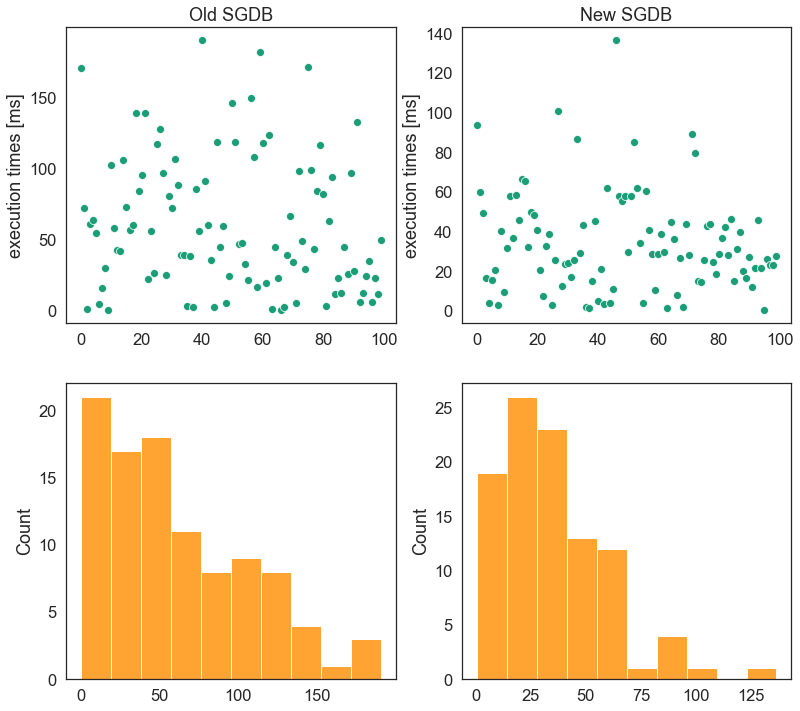

In [148]:
fig,ax=plt.subplots(nrows=2, ncols=2, figsize=(13,12))
sns.set_theme(style='white',palette='Dark2',font_scale=1.5)
ms=8 
ls=''
g=sns.lineplot(x=np.arange(0,len(extimes_old)), y=extimes_old, marker='o', 
                markersize=ms, linestyle=ls, ax=ax[0,0])
sns.lineplot(x=np.arange(0,len(extimes_new)), y=extimes_new, marker='o', 
                markersize=ms, linestyle=ls, ax=ax[0,1])
sns.histplot(x=extimes_old, ax=ax[1,0], bins=10, color='darkorange', alpha=0.8)
sns.histplot(x=extimes_new, ax=ax[1,1], bins=10, color='darkorange', alpha=0.8)
ax[0,0].set_title('Old SGDB')
ax[0,1].set_title('New SGDB')
ax[0,0].set_ylabel("execution times [ms]")
ax[0,1].set_ylabel("execution times [ms]")
fig.savefig('figs/extimes_distributions_vs_scatter.pdf', bbox_inches='tight')

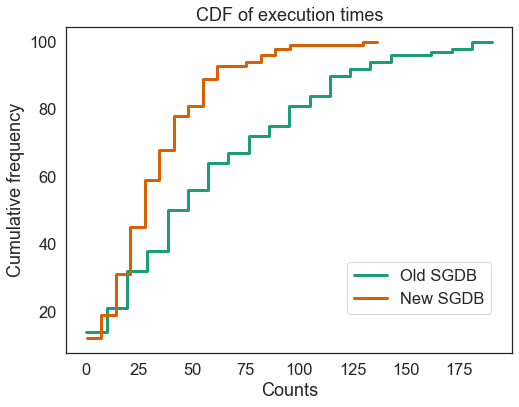

In [149]:
fig,ax=plt.subplots(figsize=(8,6))
sns.set_theme(style='white',palette='Dark2',font_scale=1.5)
ms=8 
ls=''
g=sns.histplot(x=extimes_old, ax=ax, bins=20, cumulative=True, element="step",
                fill=False, linewidth=3, label = 'Old SGDB')
sns.histplot(x=extimes_new, ax=ax, bins=20, cumulative=True, element="step",
                fill=False, linewidth=3, label = 'New SGDB')
    
g.legend(loc='center left', bbox_to_anchor=(1, 0.2), borderaxespad=-10)
ax.set_ylabel("Cumulative frequency")
ax.set_xlabel("Counts")
ax.set_title("CDF of execution times")
fig.savefig('figs/extimes_CDF.pdf', bbox_inches='tight')

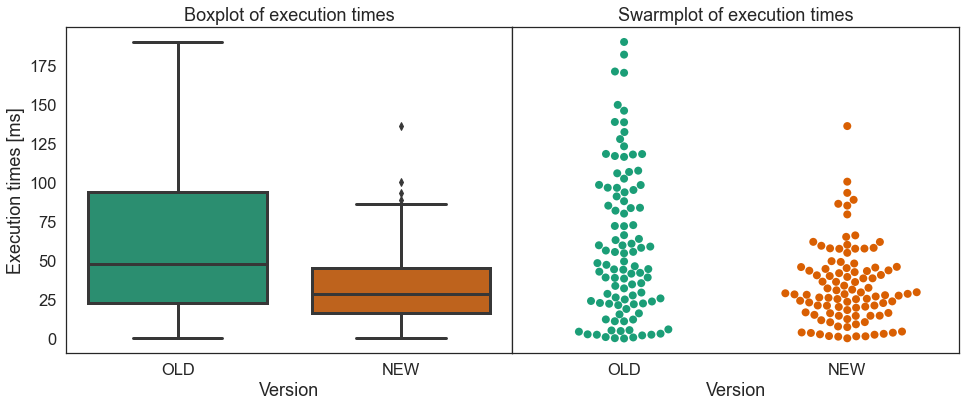

In [150]:
import pandas as pd
df = pd.DataFrame(extimes_old, columns=['execution times'])
df ['Version'] = 'OLD'
df2 = pd.DataFrame(extimes_new, columns=['execution times'])
df2 ['Version'] = 'NEW'
df = df.append(df2)

fig,ax=plt.subplots(ncols=2, figsize=(16,6))
sns.set_theme(style='white',palette='Dark2',font_scale=1.5)
g=sns.boxplot(x='Version', y='execution times', data=df, linewidth=3, ax=ax[0])
sns.swarmplot(x='Version', y='execution times', data=df, ax=ax[1], linewidth=0, size=8)
ax[0].set_title('Boxplot of execution times')
ax[1].set_title('Swarmplot of execution times')
ax[0].set_ylabel("Execution times [ms]")
ax[1].set_ylabel("")
ax[1].set_yticklabels('')
ax[1].set_ylim(ax[0].get_ylim())
fig.subplots_adjust(hspace=.0, wspace=0.)
fig.savefig('figs/extimes_quantiles.pdf', bbox_inches='tight')


# Reduction in run time

In [151]:
reduction = extimes_old-extimes_new

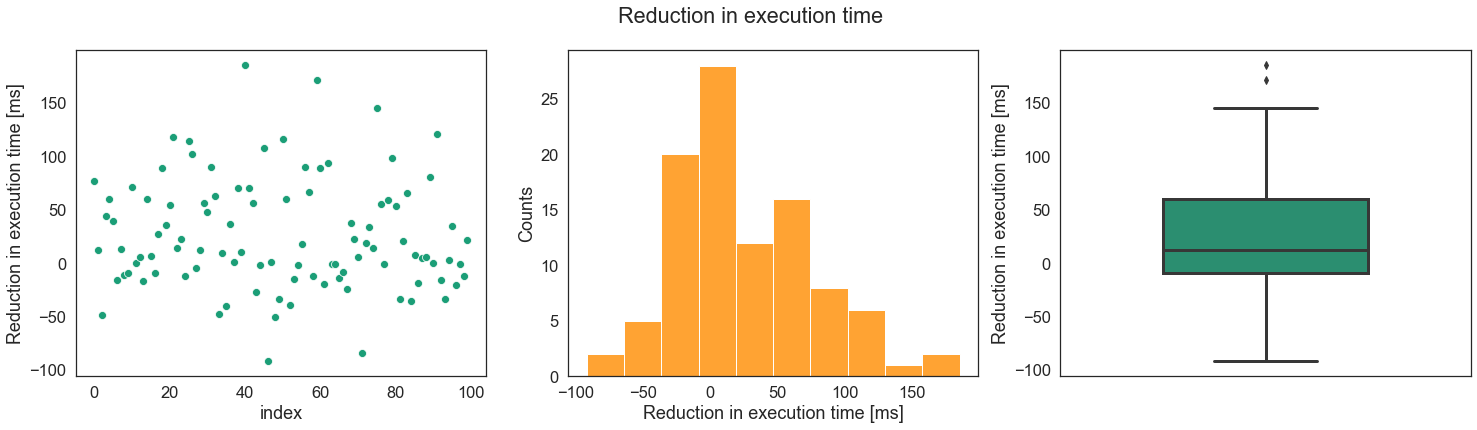

In [152]:
fig,ax=plt.subplots(nrows=1, ncols=3, figsize=(25,6))
sns.set_theme(style='white',palette='Dark2',font_scale=1.5)
ms=8 
ls=''
sns.lineplot(x=np.arange(0,len(reduction)), y=reduction, marker='o', 
                markersize=ms, linestyle=ls, ax=ax[0])
sns.histplot(x=reduction, ax=ax[1], bins=10, color='darkorange', alpha=0.8)
sns.boxplot(y=reduction, linewidth=3, ax=ax[2])
fig.suptitle('Reduction in execution time')
ax[0].set_ylabel("Reduction in execution time [ms]")
ax[1].set_ylabel("Counts")
ax[2].set_ylabel("Reduction in execution time [ms]")
ax[0].set_xlabel("index")
ax[1].set_xlabel("Reduction in execution time [ms]")
ax[2].set_xlim(-0.8,0.8)
fig.savefig('figs/extimes_reduction.pdf', bbox_inches='tight')


# Confidence intervals with different methods

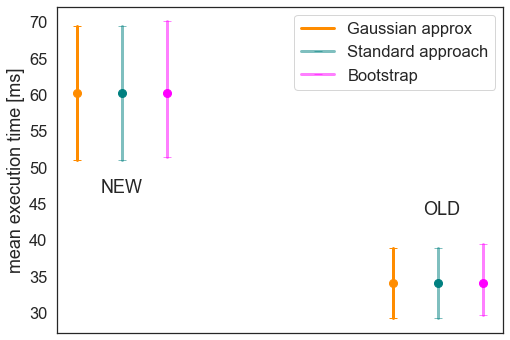

In [153]:
#assuming normal distribution (std with n-1)
gauss_CI = pd.DataFrame(np.zeros((2,4)), columns=['version','mean','lower','upper'])
gauss_CI.loc[0] = ['OLD', np.mean(extimes_old), 
                    np.mean(extimes_old)-np.std(extimes_old)*1.96/np.sqrt(len(extimes_old)), 
                    np.mean(extimes_old)+np.std(extimes_old)*1.96/np.sqrt(len(extimes_old))]
gauss_CI.loc[1] = ['NEW', np.mean(extimes_new),
                    np.mean(extimes_new)-np.std(extimes_new)*1.96/np.sqrt(len(extimes_new)),
                    np.mean(extimes_new)+np.std(extimes_new)*1.96/np.sqrt(len(extimes_new))]

#normal computation (std with n)
standard_CI = pd.DataFrame(np.zeros((2,4)), columns=['version','mean','lower','upper'])
standard_CI.loc[0] = ['OLD', np.mean(extimes_old), 
                    np.mean(extimes_old)-np.std(extimes_old, ddof=1)*1.96/np.sqrt(len(extimes_old)), 
                    np.mean(extimes_old)+np.std(extimes_old, ddof=1)*1.96/np.sqrt(len(extimes_old))]
standard_CI.loc[1] = ['NEW', np.mean(extimes_new),
                    np.mean(extimes_new)-np.std(extimes_new, ddof=1)*1.96/np.sqrt(len(extimes_new)),
                    np.mean(extimes_new)+np.std(extimes_new, ddof=1)*1.96/np.sqrt(len(extimes_new))]

#bootstrap
bootstrap_CI = pd.DataFrame(np.zeros((2,4)), columns=['version','mean','lower','upper'])
from scipy.stats import bootstrap
ci_old = bootstrap((extimes_old,), np.mean).confidence_interval
ci_new = bootstrap((extimes_new,), np.mean).confidence_interval
bootstrap_CI.loc[0] = ['OLD', np.mean(extimes_old), ci_old[0], ci_old[1]]
bootstrap_CI.loc[1] = ['NEW', np.mean(extimes_new), ci_new[0], ci_new[1]]
lw=3
ms=8
fig,ax=plt.subplots(figsize=(8,6))
ax.plot((1,1), (gauss_CI.iloc[0,2], gauss_CI.iloc[0,3]) , marker='_', color='darkorange', label='Gaussian approx', linewidth=lw, markersize=ms)
ax.plot((8,8), (gauss_CI.iloc[1,2], gauss_CI.iloc[1,3]) , color='darkorange', linewidth=lw, marker='_', markersize=ms)
ax.plot((2,2), (standard_CI.iloc[0,2],standard_CI.iloc[0,3]) ,color='teal', alpha=0.5, label='Standard approach', linewidth=lw, marker='_', markersize=ms)
ax.plot((9,9), (standard_CI.iloc[1,2],standard_CI.iloc[1,3]) ,color='teal', alpha=0.5, linewidth=lw, marker='_', markersize=ms)
ax.plot((3,3), (bootstrap_CI.iloc[0,2],bootstrap_CI.iloc[0,3]) ,color='magenta', alpha=0.5, label='Bootstrap', linewidth=lw, marker='_', markersize=ms)
ax.plot((10,10), (bootstrap_CI.iloc[1,2],bootstrap_CI.iloc[1,3]) ,color='magenta', alpha=0.5, linewidth=lw, marker='_', markersize=ms)
ax.plot(1, gauss_CI.iloc[0,1], marker='o', color='darkorange', linewidth=lw, markersize=ms)
ax.plot(8, gauss_CI.iloc[1,1], marker='o', color='darkorange', linewidth=lw, markersize=ms)
ax.plot(2, standard_CI.iloc[0,1], marker='o', color='teal', linewidth=lw, markersize=ms)
ax.plot(9, standard_CI.iloc[1,1], marker='o', color='teal', linewidth=lw, markersize=ms)
ax.plot(3, bootstrap_CI.iloc[0,1], marker='o', color='magenta', linewidth=lw, markersize=ms)
ax.plot(10, bootstrap_CI.iloc[1,1], marker='o', color='magenta', linewidth=lw, markersize=ms)
ax.legend(loc='upper right')
ax.set_xticklabels('')
ax.set_ylabel("mean execution time [ms]")
fig.text(0.2, 0.45, 'NEW' )
fig.text(0.76, 0.4, 'OLD' )

fig.savefig('figs/CI_methods_comparison.pdf', bbox_inches='tight')

#  Daily balance at Joe’s wireless access shop over 93 days

In [154]:
balance = np.loadtxt('data/figure 2.10/joe.dat')

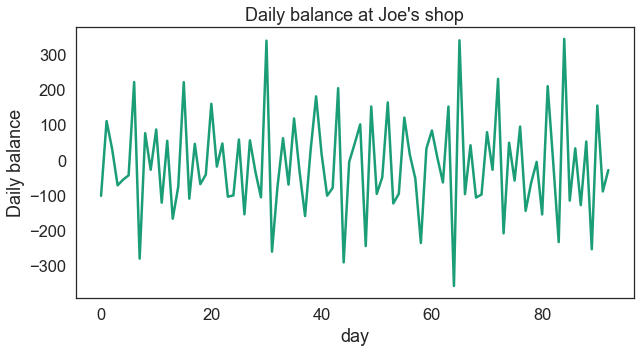

In [155]:
fig,ax=plt.subplots(figsize=(10,5))
sns.set_theme(style='white',palette='Dark2',font_scale=1.5)
ls='solid'
sns.lineplot(x=np.arange(len(balance)), y=balance, linestyle=ls, ax=ax, linewidth=2.5)
ax.set_ylabel("Daily balance")
ax.set_xlabel("day")
ax.set_title("Daily balance at Joe's shop")
fig.savefig('figs/joe_lineplot.pdf', bbox_inches='tight')

In [156]:
#lag plots
df = pd.DataFrame(np.zeros((len(balance),10)), columns=['balance',*['lag_{}'.format(i) for i in range(1,10)]])
df.loc[:, 'balance'] = balance
for i in range(1,10):
    df.loc[:, 'lag_{}'.format(i)] = df['balance'].shift(periods=i)
df = df.dropna()
df.index = np.arange(len(df))

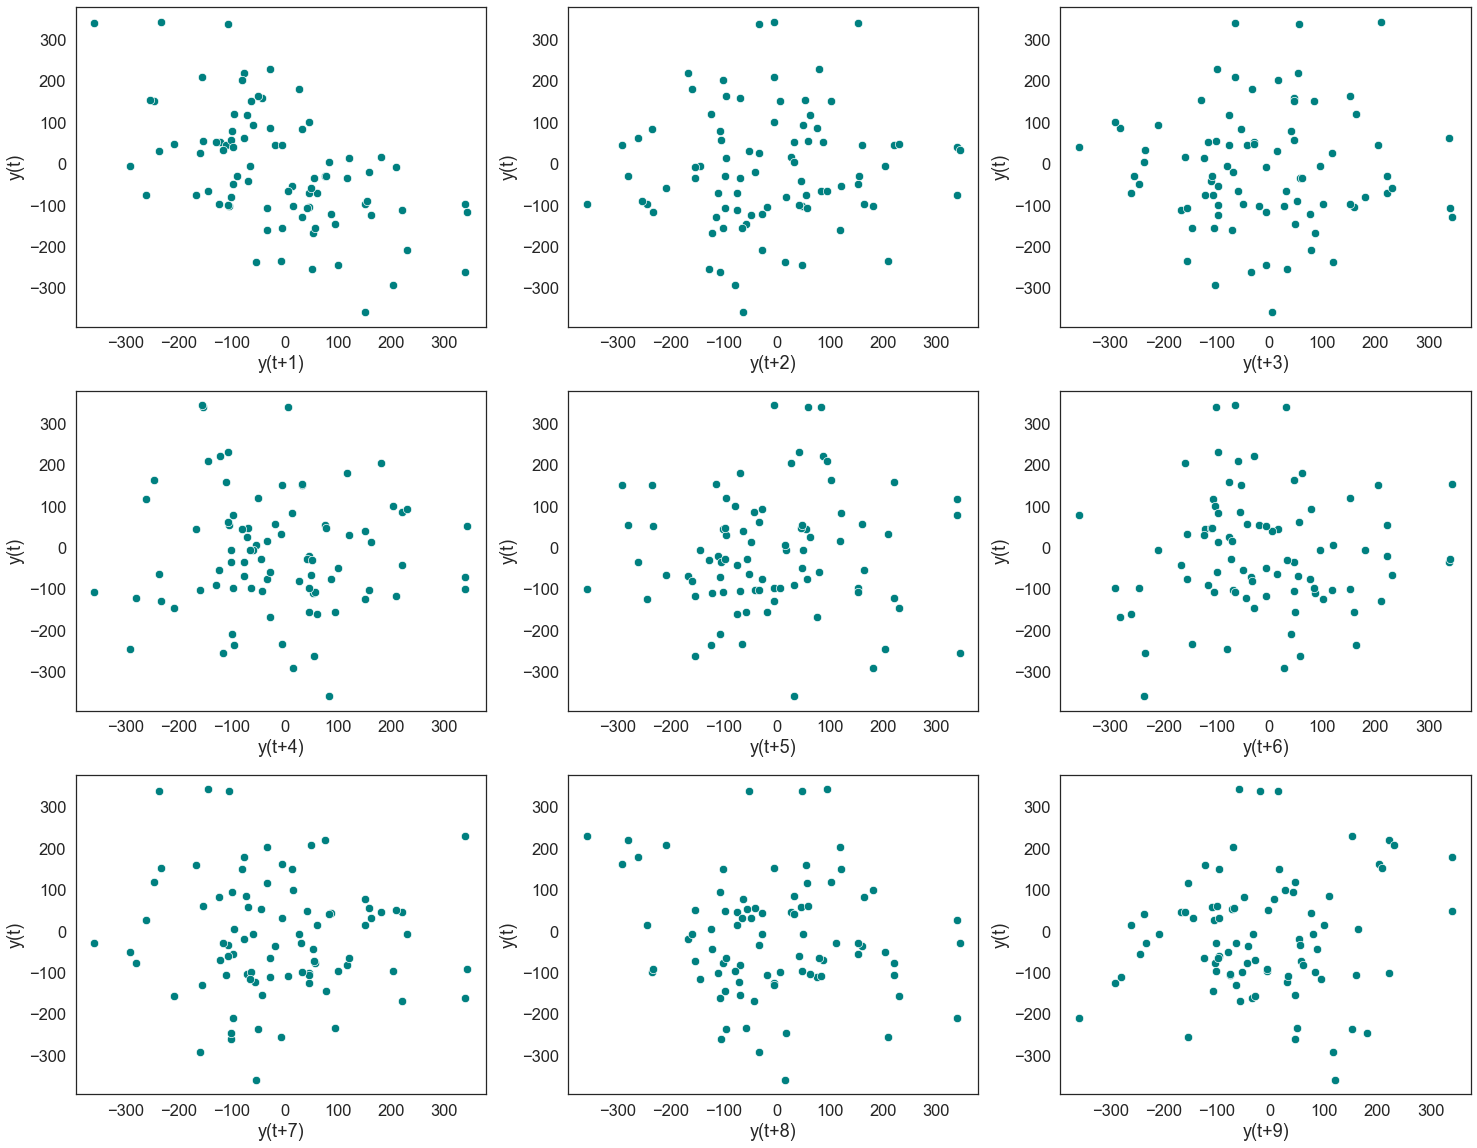

In [157]:
fig,ax=plt.subplots(3,3,figsize=(25,20))
for i in range(9):
    sns.scatterplot(y='balance', x='lag_{}'.format(i+1), data=df, ax=ax[i//3,i%3], color='teal', s=70)
    ax[i//3,i%3].set_xlabel("y(t+{})".format(i+1))
    ax[i//3,i%3].set_ylabel("y(t)")
fig.savefig('figs/joe_lag_plots.pdf', bbox_inches='tight')
    

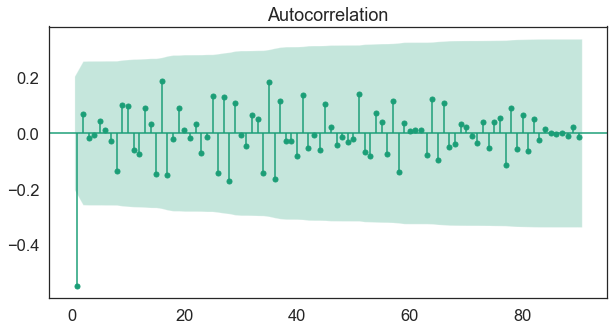

In [158]:
fig,ax=plt.subplots(figsize=(10,5))
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(balance, lags=90, ax=ax,zero=False)
fig.savefig('figs/joe_autocorr.pdf', bbox_inches='tight')
